In [19]:
import pandas as pd

optout = pd.read_csv('P2P_Opt_Outs_0000_part_00_combine.csv')
info = pd.read_csv('P2P_VBMChase_TargetedVoters_Info_0000_part_00_combine.csv')
messages = pd.read_csv('P2P_VBMChase_Messages_0000_part_00_combine.csv')


/Users/ktyser/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
#dataframe containing voter information
df2 = pd.read_csv("P2P_VBMChase_TargetedVoters_Info_0000_part_00_combine.csv")
df2['vote_method'].fillna("Did not vote", inplace=True)
df2_demographics = df2.drop_duplicates(subset=['voter_uuid'])

In [20]:
optout.head()

,id,cell_uuid,reason_code,created_at,updated_at
0,15,0985e9a9ddd996eb3c062e84d08db420073903ca,NaN,2020-09-01 23:07:52.434225+00,2020-09-01 23:07:52.434225+00
1,22,99b0c55b252da536fad6dfbff8fb1f60a13b79c8,NaN,2020-09-01 23:14:06.708029+00,2020-09-01 23:14:06.708029+00
2,23,8c2fd2c8c0d9d4d5b15910c8d26d9d59768f0ba1,NaN,2020-09-01 23:14:12.144437+00,2020-09-01 23:14:12.144437+00
3,24,8a1fa0fa9f33feed714e2ab1bd75ccfd6436b880,NaN,2020-09-01 23:16:07.415567+00,2020-09-01 23:16:07.415567+00
4,27,305bc77cb3ff4c2dfb9265fdff523b0a5bdedabf,NaN,2020-09-01 23:16:26.791302+00,2020-09-01 23:16:26.791302+00


In [21]:
info.head()

,voter_uuid,state,marital_status,race,gender,age,vote_propensity,cell_accuracy_score,vote_method
0,9397f4525341bd5448122481dbeef04c6cfebe26,AZ,Unmarried,Hispanic,Female,52.0,3,1,Polls
1,3f134ad50d67866d982f1fe3cd01e14845138e78,AZ,Unmarried,Hispanic,Female,32.0,2,0,NaN
2,f3ac6e5ca71d9d4e9d82dc1b47c3d383cb9169d6,AZ,Married,Uncoded,Female,77.0,8,0,Early Vote
3,84ed676dbafe3cc84339d98e8d169d571828ce1f,AZ,Unmarried,Hispanic,Female,35.0,6,2,Early Vote
4,a4e818f70ec2a971f7b0ef32dea0440aa3b28388,AZ,Unknown,Caucasian,Unknown,33.0,8,0,Early Vote


In [22]:
messages.head()

,message_id,campaign_id,campaign_contact_id,cell_uuid,voter_uuid,state,error_codes,title,text,use_case,message_created_at
0,52872094,365,51615446,5d7b815cdc0cf2625974f55f3ac29255f733190e,b67be4942589e10cf2dd3da7efd40e00bd12f96e,NE,NaN,"(VOLUNTEERS) 10/10/2020 - NE - VBM Chase, 1st ...",VoteAmerica PSA: Remind your friends and famil...,vbm chase,2020-10-10 21:01:50.606294+00
1,51217563,360,51318812,caa434e8a69e3fb985f027a325fc77b70e3b3e8f,cc24b6bed669f208f60f402351091799a286f055,GA,NaN,"10/10/2020 - GA - VBM Chase, 1st Pass",VoteAmerica PSA: Remind your friends and famil...,vbm chase,2020-10-10 16:09:07.853036+00
2,57437529,394,57034995,6aa5c9273e3f3e7d15bc108a730e26be2eec7c86,19dce719bd543e0fa191e9e280e739601eb6f3d6,AZ,NaN,(Assigned to TextSurge) 10/11/2020 - AZ - VBM...,VoteAmerica PSA: Remind your friends and famil...,vbm chase,2020-10-11 23:13:52.226002+00
3,68149992,461,67840768,1bdbe693d376e9eaba2011ef6fd6d09b1c4ef3f6,747c7d562771f8af691c320b6eef2cfc857acf74,AZ,NaN,"10/15/2020 - AZ - VBM Chase, List 1, 2nd Pass",VoteAmerica PSA: Join millions of people like ...,vbm chase,2020-10-15 19:49:51.014599+00
4,97027789,815,95193243,f666968a4a02992d82ee66233376b4126a3c6814,11adfa5d91c10d9a6b8089e809b7e004a6f97bf2,OH,NaN,"10/31/2020 - OH - VBM Chase, 5th Pass",VoteAmerica PSA: Drop off your OH ballot TODAY...,vbm chase,2020-10-31 19:24:12.011109+00


In [23]:
#combining opt out and message dataframes
df = pd.merge(optout, messages, left_on='cell_uuid', right_on='cell_uuid') 

In [24]:
df.head()

,id,cell_uuid,reason_code,created_at,updated_at,message_id,campaign_id,campaign_contact_id,voter_uuid,state,error_codes,title,text,use_case,message_created_at
0,592120,d002142b52c45bab1949d96668f2a85fe132509b,NaN,2020-09-29 22:32:36.125515+00,2020-09-29 22:32:36.125515+00,32067240,217,31104273,a36deb6ccb64d2b046fbd49a4ffed506d9a8cdd9,UT,{21610},9/29/2020 - UT - VBM Chase (Link in Initial),I'm opting you out of texts immediately. Have ...,vbm chase,2020-09-29 22:32:36.134904+00
1,592120,d002142b52c45bab1949d96668f2a85fe132509b,NaN,2020-09-29 22:32:36.125515+00,2020-09-29 22:32:36.125515+00,31746311,217,31104273,a36deb6ccb64d2b046fbd49a4ffed506d9a8cdd9,UT,NaN,9/29/2020 - UT - VBM Chase (Link in Initial),VoteAmerica PSA: Don't let coronavirus take aw...,vbm chase,2020-09-29 21:42:42.783473+00
2,592891,c0fbe60b2953dbbd708f15da06596d940dc0cd8a,NaN,2020-09-29 22:42:06.843946+00,2020-09-29 22:42:06.843946+00,32085215,217,31051709,d9b0b71998a8fd9288fda3c6f737ee4a54d81636,UT,{21610},9/29/2020 - UT - VBM Chase (Link in Initial),I'm opting you out of texts immediately. Have ...,vbm chase,2020-09-29 22:42:06.854678+00
3,592891,c0fbe60b2953dbbd708f15da06596d940dc0cd8a,NaN,2020-09-29 22:42:06.843946+00,2020-09-29 22:42:06.843946+00,31844818,217,31051709,d9b0b71998a8fd9288fda3c6f737ee4a54d81636,UT,NaN,9/29/2020 - UT - VBM Chase (Link in Initial),VoteAmerica PSA: Don't let coronavirus take aw...,vbm chase,2020-09-29 21:55:51.10+00
4,593138,e8a23999bcfd234a4089c51baf31833ba968d71d,NaN,2020-09-29 22:49:06.234378+00,2020-09-29 22:49:06.234378+00,32094354,217,31099631,6d4f9af8b3b6dbecb96076ddda95d241aabf62e1,UT,{21610},9/29/2020 - UT - VBM Chase (Link in Initial),I'm opting you out of texts immediately. Have ...,vbm chase,2020-09-29 22:49:06.24563+00


In [25]:
#combining master dataframe with info dataframe
df = pd.merge(df, info, left_on='voter_uuid', right_on='voter_uuid') 

In [26]:
df.head()

,id,cell_uuid,reason_code,created_at,updated_at,message_id,campaign_id,campaign_contact_id,voter_uuid,state_x,...,use_case,message_created_at,state_y,marital_status,race,gender,age,vote_propensity,cell_accuracy_score,vote_method
0,592120,d002142b52c45bab1949d96668f2a85fe132509b,NaN,2020-09-29 22:32:36.125515+00,2020-09-29 22:32:36.125515+00,32067240,217,31104273,a36deb6ccb64d2b046fbd49a4ffed506d9a8cdd9,UT,...,vbm chase,2020-09-29 22:32:36.134904+00,UT,Unmarried,Caucasian,Male,26.0,1,0,NaN
1,592120,d002142b52c45bab1949d96668f2a85fe132509b,NaN,2020-09-29 22:32:36.125515+00,2020-09-29 22:32:36.125515+00,31746311,217,31104273,a36deb6ccb64d2b046fbd49a4ffed506d9a8cdd9,UT,...,vbm chase,2020-09-29 21:42:42.783473+00,UT,Unmarried,Caucasian,Male,26.0,1,0,NaN
2,592891,c0fbe60b2953dbbd708f15da06596d940dc0cd8a,NaN,2020-09-29 22:42:06.843946+00,2020-09-29 22:42:06.843946+00,32085215,217,31051709,d9b0b71998a8fd9288fda3c6f737ee4a54d81636,UT,...,vbm chase,2020-09-29 22:42:06.854678+00,UT,Unmarried,Uncoded,Female,43.0,5,4,NaN
3,592891,c0fbe60b2953dbbd708f15da06596d940dc0cd8a,NaN,2020-09-29 22:42:06.843946+00,2020-09-29 22:42:06.843946+00,31844818,217,31051709,d9b0b71998a8fd9288fda3c6f737ee4a54d81636,UT,...,vbm chase,2020-09-29 21:55:51.10+00,UT,Unmarried,Uncoded,Female,43.0,5,4,NaN
4,593138,e8a23999bcfd234a4089c51baf31833ba968d71d,NaN,2020-09-29 22:49:06.234378+00,2020-09-29 22:49:06.234378+00,32094354,217,31099631,6d4f9af8b3b6dbecb96076ddda95d241aabf62e1,UT,...,vbm chase,2020-09-29 22:49:06.24563+00,UT,Unmarried,Caucasian,Unknown,29.0,6,1,Absentee


In [27]:
#replacing na values and dropping duplicates
df['vote_method'].fillna("No vote method information", inplace=True)
df['reason_code'].fillna("No reason code", inplace=True)
df = df.drop_duplicates(subset=['voter_uuid'])

In [28]:
df.head()

,id,cell_uuid,reason_code,created_at,updated_at,message_id,campaign_id,campaign_contact_id,voter_uuid,state_x,...,use_case,message_created_at,state_y,marital_status,race,gender,age,vote_propensity,cell_accuracy_score,vote_method
0,592120,d002142b52c45bab1949d96668f2a85fe132509b,No reason code,2020-09-29 22:32:36.125515+00,2020-09-29 22:32:36.125515+00,32067240,217,31104273,a36deb6ccb64d2b046fbd49a4ffed506d9a8cdd9,UT,...,vbm chase,2020-09-29 22:32:36.134904+00,UT,Unmarried,Caucasian,Male,26.0,1,0,No vote method information
2,592891,c0fbe60b2953dbbd708f15da06596d940dc0cd8a,No reason code,2020-09-29 22:42:06.843946+00,2020-09-29 22:42:06.843946+00,32085215,217,31051709,d9b0b71998a8fd9288fda3c6f737ee4a54d81636,UT,...,vbm chase,2020-09-29 22:42:06.854678+00,UT,Unmarried,Uncoded,Female,43.0,5,4,No vote method information
4,593138,e8a23999bcfd234a4089c51baf31833ba968d71d,No reason code,2020-09-29 22:49:06.234378+00,2020-09-29 22:49:06.234378+00,32094354,217,31099631,6d4f9af8b3b6dbecb96076ddda95d241aabf62e1,UT,...,vbm chase,2020-09-29 22:49:06.24563+00,UT,Unmarried,Caucasian,Unknown,29.0,6,1,Absentee
6,593139,94b773164e79ea642a44409e5f3bc2863710e76b,No reason code,2020-09-29 22:49:07.250099+00,2020-09-29 22:49:07.250099+00,31764440,217,31099730,0f89ca9b1e889808829f1a0b3ab745c1fe11470c,UT,...,vbm chase,2020-09-29 21:45:07.480575+00,UT,Unmarried,Caucasian,Female,24.0,2,1,No vote method information
8,593344,f6cc968830ceb9a27a09eec1722370f4732a7d6a,No reason code,2020-09-29 22:53:10.294962+00,2020-09-29 22:53:10.294962+00,31847063,217,30979756,856ad897dbb4a894f0ba3c2dee9ef49cf10d6ec6,UT,...,vbm chase,2020-09-29 21:56:08.256379+00,UT,Married,Caucasian,Male,22.0,6,1,No vote method information


In [29]:
#looking at unique reason codes
df.reason_code.unique()

array(['No reason code', 'action_network_10_15_2020_sync',
       "Automatic opt-opt. Text: 'Stop'",
       "Automatic opt-opt. Text: 'STOP'",
       "Automatic opt-opt. Text: 'Stop \n'",
       "Automatic opt-opt. Text: 'Stop '",
       "Automatic opt-opt. Text: 'STOP '",
       "Automatic opt-opt. Text: 'STOP.'",
       "Automatic opt-opt. Text: 'Fuck you'",
       "Automatic opt-opt. Text: 'Unsubscribe'",
       "Automatic opt-opt. Text: 'stop'",
       "Automatic opt-opt. Text: 'Fuck off'",
       "Automatic opt-opt. Text: 'Stop\n'",
       "Automatic opt-opt. Text: 'stop '",
       "Automatic opt-opt. Text: 'Please stop texting me'",
       "Automatic opt-opt. Text: 'Opt out'",
       "Automatic opt-opt. Text: 'sTOP'",
       "Automatic opt-opt. Text: 'Take me off your list '",
       "Automatic opt-opt. Text: 'Stop!'",
       "Automatic opt-opt. Text: 'STOP. '",
       "Automatic opt-opt. Text: 'Stip'",
       "Automatic opt-opt. Text: 'Stop 🛑'",
       "Automatic opt-opt. Text: 

In [30]:
#filtering out values with no reason code to get opt outs
df = df[df.reason_code != 'No reason code']
df.head()

,id,cell_uuid,reason_code,created_at,updated_at,message_id,campaign_id,campaign_contact_id,voter_uuid,state_x,...,use_case,message_created_at,state_y,marital_status,race,gender,age,vote_propensity,cell_accuracy_score,vote_method
46176,1522131,2ff21cc41bdbc6b05ac54920d5ee38525903a62e,action_network_10_15_2020_sync,2020-10-15 16:31:34.2838+00,2020-10-15 16:31:34.2838+00,51667009,366,51659643,7d449bb04d15847f9ecc4bc07a2ccb5fc55a4ccf,OH,...,vbm chase,2020-10-10 16:57:34.0142+00,OH,Unmarried,African-American,Female,24.0,5,1,Unknown Vote Method
46180,1522227,2f5bb5ad691a9a93eb106472c3571ca6debfd58d,action_network_10_15_2020_sync,2020-10-15 16:31:34.2838+00,2020-10-15 16:31:34.2838+00,52030654,369,52020015,b179697f330b9fc088e113dda9e5f13c2ee7b313,FL,...,vbm chase,2020-10-10 17:35:43.074362+00,FL,Unmarried,Caucasian,Female,30.0,4,0,Absentee
46181,1522481,3f7af920ee42077bfc543ce9ae9ea73a5b601916,action_network_10_15_2020_sync,2020-10-15 16:31:34.2838+00,2020-10-15 16:31:34.2838+00,31929007,217,31057803,ff2e52937bc85da3f43d720be35c890ae73c2e3b,UT,...,vbm chase,2020-09-29 22:06:59.822522+00,UT,Unmarried,Caucasian,Male,27.0,6,4,No vote method information
46183,1522890,f15d8ee2c4c41bfe6ce4ec0447e4337f076da27c,action_network_10_15_2020_sync,2020-10-15 16:31:34.2838+00,2020-10-15 16:31:34.2838+00,65955549,446,65659371,121dbfbc1146092b26a5d75c5f4d6ff3fcd1e059,MI,...,vbm chase,2020-10-14 20:34:37.268844+00,MI,Unmarried,Caucasian,Female,29.0,8,1,Absentee
46185,1523686,d997a1306d3a54b649ce5fb7a396dccf626557a0,action_network_10_15_2020_sync,2020-10-15 16:31:34.2838+00,2020-10-15 16:31:34.2838+00,51852859,368,51847917,3f19b1310748f309b0115fb1eafe842f42649bb8,FL,...,vbm chase,2020-10-10 17:17:09.790656+00,FL,Unmarried,Hispanic,Male,38.0,8,1,Absentee


In [45]:
#opt out married values
married = df["marital_status"].value_counts()
married_vals = married /married.sum()
print(married_vals)

#voter married values
married_voters = df2_demographics["marital_status"].value_counts()
married_voter_vals = married_voters /married_voters.sum()
print(married_voter_vals)

Unmarried    0.685300
Married      0.245498
Unknown      0.069202
Name: marital_status, dtype: float64
Unmarried    0.700379
Married      0.243238
Unknown      0.056383
Name: marital_status, dtype: float64


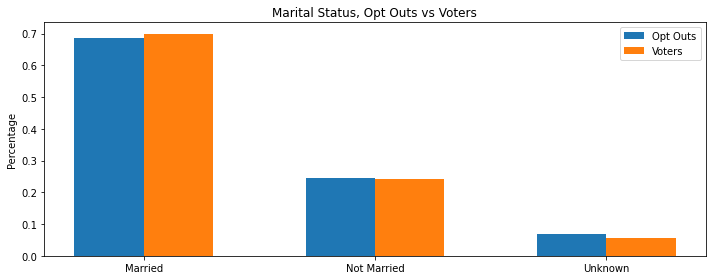

In [61]:
#plotting marital status of opt outs vs voters
import matplotlib.pyplot as plt
import numpy as np

labels = ["Married", "Not Married", "Unknown"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, married_vals, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, married_voter_vals, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Marital Status, Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
fig.tight_layout()
plt.show()

In [158]:
#voter race values
race_voters = df2_demographics["race"].value_counts()
race_voter_vals = (race_voters /race_voters.sum())*100
print(race_voter_vals)

#opt out race values
race = df["race"].value_counts()
race_vals = (race /race.sum())*100
print(race_vals)

Caucasian           51.072990
Hispanic            22.017260
African-American    15.589980
Uncoded              5.611252
Asian                3.780138
Other                1.355695
Native American      0.572684
Name: race, dtype: float64
Caucasian           54.580569
Hispanic            17.708367
African-American    16.675838
Uncoded              5.220910
Asian                3.601446
Other                1.575228
Native American      0.637644
Name: race, dtype: float64


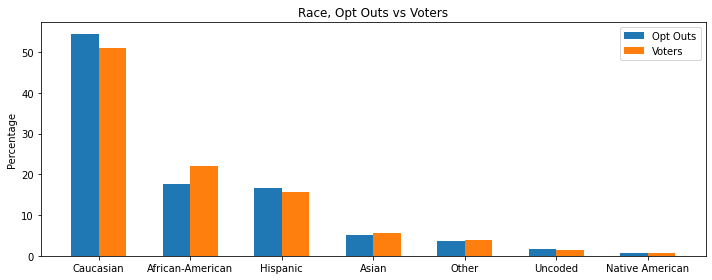

In [159]:
#plotting race for opt outs vs voters
labels = ["Caucasian", "African-American", "Hispanic", "Asian", "Other", "Uncoded", "Native American"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, race_vals, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, race_voter_vals, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Race, Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
fig.tight_layout()
plt.show()
#VoteAmerica may not be reaching POC as much as they want

In [75]:
#voter gender values
gender_voters = df2_demographics["gender"].value_counts()
gender_voter_vals = (gender_voters /gender_voters.sum()) 
print(gender_voter_vals)

#opt out gender values
gender = df["gender"].value_counts()
gender_vals = gender /gender.sum()
print(gender_vals)

Female     0.549604
Male       0.359371
Unknown    0.091025
Name: gender, dtype: float64
Female     0.642294
Male       0.271997
Unknown    0.085710
Name: gender, dtype: float64


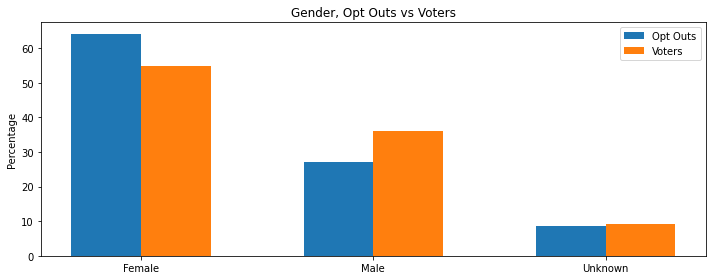

In [68]:
#plotting gender for opt outs vs voters
labels = ["Female", "Male", "Unknown"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, gender_vals, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, gender_voter_vals, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Gender, Opt Outs vs Votebrs")
ax.set_ylabel("Percentage")
ax.legend()
fig.tight_layout()
plt.show()

In [151]:
#voter state values
state_voters = df2_demographics["state"].value_counts()[:18]
state_voter_vals = (state_voters /state_voters.sum()) *100
print(state_voter_vals)

#opt out state values
state = df["state_x"].value_counts()[:20]
state_vals = (state /state.sum())*100
print(state_vals)

FL    20.793951
CO    14.851418
AZ    13.822660
NV     9.773359
PA     7.050621
MI     6.709939
UT     6.600283
GA     6.464257
OH     5.243939
NC     1.565281
MT     1.215313
KS     1.206752
IA     1.042142
MN     1.006159
TX     0.910723
NE     0.761856
WI     0.634100
ME     0.347248
Name: state, dtype: float64
AZ    18.789448
GA    15.929223
CO    15.754437
FL    15.376814
PA    11.162540
MI     6.675298
UT     5.283487
OH     3.025301
MT     2.831095
KS     1.220262
NC     0.973189
IA     0.714247
WI     0.572908
NE     0.482279
MN     0.456385
NV     0.319361
TX     0.223337
ME     0.210390
Name: state_x, dtype: float64


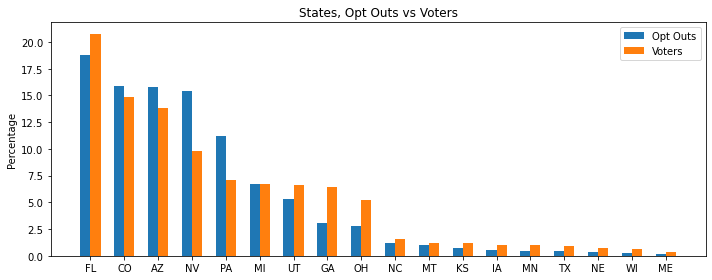

In [152]:
#plotting states for opt outs vs voters
labels = ["FL","CO","AZ","NV","PA","MI","UT","GA","OH","NC","MT","KS","IA","MN","TX","NE","WI","ME"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, state_vals, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, state_voter_vals, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("States, Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
fig.tight_layout()
plt.show()

In [157]:
#voter age values
age_voters = df2_demographics["age_intervals"].value_counts()
age_voter_vals = age_voters /age_voters.sum()
print(age_voter_vals)

#opt out age values
age = df["age_intervals"].value_counts()
age_vals = age /age.sum()
print(age_vals)

(18, 24]    0.276840
(25, 30]    0.211701
(30, 39]    0.195946
(40, 49]    0.133282
(50, 64]    0.102688
(24, 25]    0.046079
(39, 40]    0.018106
(49, 50]    0.009494
(64, 65]    0.005863
Name: age_intervals, dtype: float64
(18, 24]    0.295351
(25, 30]    0.210069
(30, 39]    0.208432
(40, 49]    0.130556
(50, 64]    0.076124
(24, 25]    0.049235
(39, 40]    0.018602
(49, 50]    0.008128
(64, 65]    0.003503
Name: age_intervals, dtype: float64


(17.927, 25.2]    0.347887
(25.2, 32.4]      0.248759
(32.4, 39.6]      0.145757
(39.6, 46.8]      0.103250
(46.8, 54.0]      0.069765
(54.0, 61.2]      0.035514
(61.2, 68.4]      0.023956
(68.4, 75.6]      0.013964
(75.6, 82.8]      0.006971
(82.8, 90.0]      0.004176
Name: age, dtype: float64


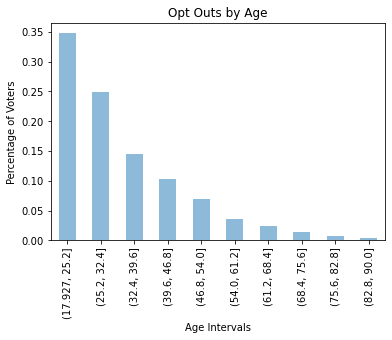

In [36]:
#unfinished graph
labels = ["(18, 24]",]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, age_vals, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, age_voter_vals, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Age, Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
fig.tight_layout()
plt.show()

In [160]:
#voter marital status and gender combined values
marital_and_gender_voters = df2_demographics.groupby(["marital_status", "gender"]).size()
marital_and_gender_voters = (marital_and_gender_voters / marital_and_gender_voters.sum()) *100
print(marital_and_gender_voters)

#opt out marital status and gender combined values
marital_and_gender = df.groupby(["marital_status", "gender"]).size()
marital_and_gender = (marital_and_gender / marital_and_gender.sum())*100
print(marital_and_gender)

marital_status  gender 
Married         Female     11.987189
                Male       11.096928
                Unknown     1.239675
Unknown         Female      2.934161
                Male        2.020904
                Unknown     0.683214
Unmarried       Female     40.039099
                Male       22.819239
                Unknown     7.179592
dtype: float64
marital_status  gender 
Married         Female     14.851378
                Male        8.306630
                Unknown     1.391811
Unknown         Female      4.194854
                Male        1.894589
                Unknown     0.830771
Unmarried       Female     45.183147
                Male       16.998436
                Unknown     6.348384
dtype: float64


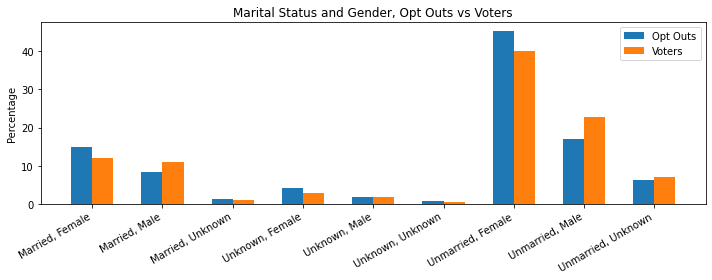

In [161]:
#plotting marital status and gender combined for opt outs vs voters
labels = ["Married, Female","Married, Male", "Married, Unknown", "Unknown, Female", "Unknown, Male", "Unknown, Unknown",
         "Unmarried, Female", "Unmarried, Male", "Unmarried, Unknown"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, marital_and_gender, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, marital_and_gender_voters, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Marital Status and Gender, Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()
plt.show()

In [162]:
#voter marital status and race combined values
marital_and_race_voters = df2_demographics.groupby(["marital_status", "race"]).size()
marital_and_race_voters = (marital_and_race_voters / marital_and_race_voters.sum())*100
print(marital_and_race_voters)

#opt outs marital status and race combined values
marital_and_race = df.groupby(["marital_status", "race"]).size()
marital_and_race = (marital_and_race / marital_and_race.sum())*100
print(marital_and_race)

marital_status  race            
Married         African-American     2.980726
                Asian                1.151644
                Caucasian           13.825398
                Hispanic             4.613885
                Native American      0.105645
                Other                0.433524
                Uncoded              1.212970
Unknown         African-American     0.839452
                Asian                0.180591
                Caucasian            3.242395
                Hispanic             0.931976
                Native American      0.048348
                Other                0.062396
                Uncoded              0.333121
Unmarried       African-American    11.769802
                Asian                2.447903
                Caucasian           34.005197
                Hispanic            16.471398
                Native American      0.418692
                Other                0.859775
                Uncoded              4.065161
d

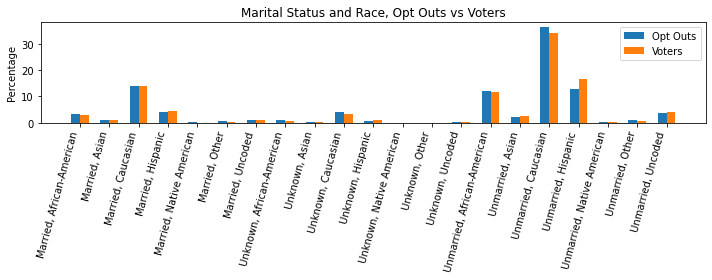

In [163]:
#plotting marital status and race combined for opt outs vs voters
labels = ["Married, African-American","Married, Asian", "Married, Caucasian", "Married, Hispanic", "Married, Native American", "Married, Other",
         "Married, Uncoded", "Unknown, African-American", "Unknown, Asian", "Unknown, Caucasian", "Unknown, Hispanic",
         "Unknown, Native American", "Unknown, Other", "Unknown, Uncoded", "Unmarried, African-American", "Unmarried, Asian",
         "Unmarried, Caucasian", "Unmarried, Hispanic", "Unmarried, Native American", "Unmarried, Other", "Unmarried, Uncoded"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, marital_and_race, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, marital_and_race_voters, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Marital Status and Race, Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=75, horizontalalignment='right')
fig.tight_layout()
plt.show()

In [164]:
#voter gender and race combined values
gender_and_race_voters = df2_demographics.groupby(["gender", "race"]).size()
gender_and_race_voters = (gender_and_race_voters / gender_and_race_voters.sum())*100

#opt outs gender and race combined values
gender_and_race = df.groupby(["gender", "race"]).size()
gender_and_race = (gender_and_race / gender_and_race.sum())*100

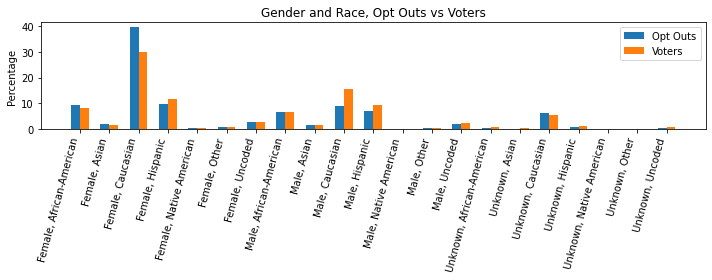

In [165]:
#plotting gender and race combined values for opt outs vs voters
labels = ["Female, African-American","Female, Asian", "Female, Caucasian", "Female, Hispanic", "Female, Native American", "Female, Other",
         "Female, Uncoded", "Male, African-American", "Male, Asian", "Male, Caucasian", "Male, Hispanic",
         "Male, Native American", "Male, Other", "Male, Uncoded", "Unknown, African-American", "Unknown, Asian",
         "Unknown, Caucasian", "Unknown, Hispanic", "Unknown, Native American", "Unknown, Other", "Unknown, Uncoded"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, gender_and_race, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, gender_and_race_voters, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Gender and Race, Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=75, horizontalalignment='right')
fig.tight_layout()
plt.show()

In [155]:
#creating age intervals

bins = [18, 24,  29, 39, 49, 64]
df['age_intervals'] = pd.cut(df['age'],bins)
df.head()

#bins = [18, 24, 25, 30, 39, 40, 49, 50, 64, 65]
df2_demographics['age_intervals'] = pd.cut(df2_demographics['age'],bins)
df2_demographics.head()

/var/folders/q4/ptkzrlkn4jv7hpl3gcsd4vqc0000gn/T/ipykernel_58803/3229138039.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_demographics['age_intervals'] = pd.cut(df2_demographics['age'],bins)


,voter_uuid,state,marital_status,race,gender,age,vote_propensity,cell_accuracy_score,vote_method,age_cutoff,age_cutoff2,age_intervals
0,9397f4525341bd5448122481dbeef04c6cfebe26,AZ,Unmarried,Hispanic,Female,52.0,3,1,Polls,"(50.0, 64.0]","(30.0, 64.0]","(50.0, 64.0]"
1,3f134ad50d67866d982f1fe3cd01e14845138e78,AZ,Unmarried,Hispanic,Female,32.0,2,0,Did not vote,"(0.0, 50.0]","(30.0, 64.0]","(30.0, 39.0]"
2,f3ac6e5ca71d9d4e9d82dc1b47c3d383cb9169d6,AZ,Married,Uncoded,Female,77.0,8,0,Early Vote,NaN,NaN,NaN
3,84ed676dbafe3cc84339d98e8d169d571828ce1f,AZ,Unmarried,Hispanic,Female,35.0,6,2,Early Vote,"(0.0, 50.0]","(30.0, 64.0]","(30.0, 39.0]"
4,a4e818f70ec2a971f7b0ef32dea0440aa3b28388,AZ,Unknown,Caucasian,Unknown,33.0,8,0,Early Vote,"(0.0, 50.0]","(30.0, 64.0]","(30.0, 39.0]"


In [137]:
#create 0-50 age bucket for a graph
bins = [0, 50, 64, 65]
df['age_cutoff'] = pd.cut(df['age'],bins)
df.head()

#doing the same for the other df
bins = [0, 50, 64, 65]
df2_demographics['age_cutoff'] = pd.cut(df2_demographics['age'],bins)


/var/folders/q4/ptkzrlkn4jv7hpl3gcsd4vqc0000gn/T/ipykernel_58803/940493967.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_demographics['age_cutoff'] = pd.cut(df2_demographics['age'],bins)


In [147]:
#create 0-30 age bucket for a graph
bins = [0, 30, 64, 65]
df['age_cutoff2'] = pd.cut(df['age'],bins)
df.head()

#doing the same for the other df
bins = [0, 30, 64, 65]
df2_demographics['age_cutoff2'] = pd.cut(df2_demographics['age'],bins)

/var/folders/q4/ptkzrlkn4jv7hpl3gcsd4vqc0000gn/T/ipykernel_58803/767722110.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_demographics['age_cutoff2'] = pd.cut(df2_demographics['age'],bins)


In [166]:
#unfinished cell
gender_and_age_voters = df2_demographics.groupby(["gender", "age_cutoff2"]).size()
gender_and_age_voters = (gender_and_age_voters / gender_and_age_voters.sum())*100
print(gender_and_age_voters)

gender_and_age = df.groupby(["gender", "age_cutoff2"]).size()
gender_and_age = (gender_and_age / gender_and_age.sum())*100
print(gender_and_age)

gender   age_cutoff2
Female   (0, 30]        27.275525
         (30, 64]       27.509239
         (64, 65]        0.292085
Male     (0, 30]        21.274472
         (30, 64]       13.920486
         (64, 65]        0.260436
Unknown  (0, 30]         5.963150
         (30, 64]        3.484026
         (64, 65]        0.020582
dtype: float64
gender   age_cutoff2
Female   (0, 30]        35.706703
         (30, 64]       28.557541
         (64, 65]        0.189959
Male     (0, 30]        14.746405
         (30, 64]       11.881376
         (64, 65]        0.138558
Unknown  (0, 30]         6.075336
         (30, 64]        2.690713
         (64, 65]        0.013409
dtype: float64


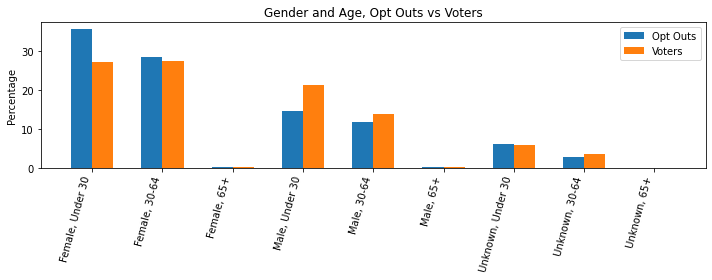

In [170]:
#unfinished graph
labels = ["Female, Under 30","Female, 30-64", "Female, 65+", "Male, Under 30", "Male, 30-64",
          "Male, 65+",
         "Unknown, Under 30", "Unknown, 30-64", "Unknown, 65+"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, gender_and_age, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, gender_and_age_voters, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Gender and Age, Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=75, horizontalalignment='right')
fig.tight_layout()
plt.show()
#VoteAmerica is reaching their targeted audience of women under 30

In [168]:
#opt outs gender, age, and marital status combined values
gender_age_marital_status = df.groupby(["gender", "age_cutoff", "marital_status"]).size()
gender_age_marital_status = (gender_age_marital_status / gender_age_marital_status.sum())*100

#voter gender, age, and marital status combined values
gender_age_marital_status_voters = df2_demographics.groupby(["gender", "age_cutoff", "marital_status"]).size()
gender_age_marital_status_voters = (gender_age_marital_status_voters / gender_age_marital_status_voters.sum())*100

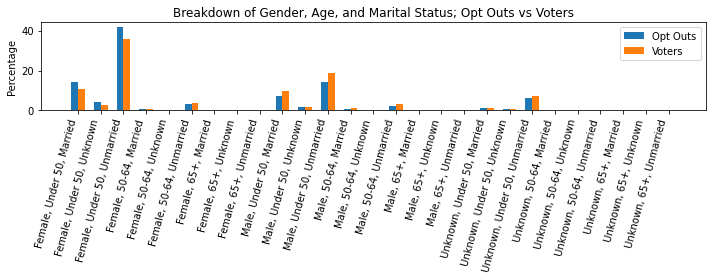

In [171]:
#plotting gender, age, and marital status combined for opt outs vs voters
labels = ["Female, Under 50, Married","Female, Under 50, Unknown", "Female, Under 50, Unmarried", "Female, 50-64, Married",
          "Female, 50-64, Unknown", "Female, 50-64, Unmarried",
         "Female, 65+, Married", "Female, 65+, Unknown", "Female, 65+, Unmarried", "Male, Under 50, Married", 
          "Male, Under 50, Unknown",
         "Male, Under 50, Unmarried", "Male, 50-64, Married", "Male, 50-64, Unknown", "Male, 50-64, Unmarried",
          "Male, 65+, Married",
         "Male, 65+, Unknown", "Male, 65+, Unmarried", "Unknown, Under 50, Married", "Unknown, Under 50, Unknown",
          "Unknown, Under 50, Unmarried",
          "Unknown, 50-64, Married",
         "Unknown, 50-64, Unknown","Unknown, 50-64, Unmarried","Unknown, 65+, Married",
          "Unknown, 65+, Unknown","Unknown, 65+, Unmarried"]
ind = np.arange(len(labels))
fig, ax = plt.subplots()
fig.set_figwidth(10)
rects1 = ax.bar(ind - width/2, gender_age_marital_status, width, label="Opt Outs")
rects2 = ax.bar(ind + width/2, gender_age_marital_status_voters, width, label="Voters")
ax.set_xticks(ind)
ax.set_xticklabels(labels)
ax.set_title("Breakdown of Gender, Age, and Marital Status; Opt Outs vs Voters")
ax.set_ylabel("Percentage")
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=75, horizontalalignment='right')
fig.tight_layout()
plt.show()
#showing VoteAmerica is reaching their targeted audience of women under 50

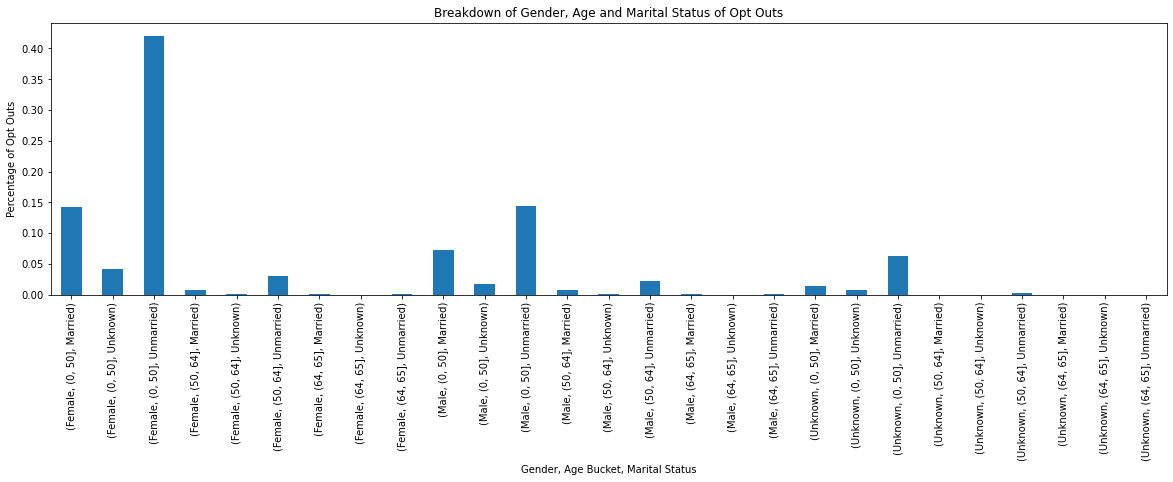

In [143]:
# plot of gender, age, and marital status for only opt outs
gender_age_marital_status = df.groupby(["gender", "age_cutoff", "marital_status"]).size()
gender_age_marital_status = gender_age_marital_status / gender_age_marital_status.sum()
plt.figure(figsize=(20, 5))
gender_age_marital_status.plot(kind='bar')
plt.ylabel("Percentage of Opt Outs")
plt.xlabel("Gender, Age Bucket, Marital Status")
plt.title("Breakdown of Gender, Age and Marital Status of Opt Outs")
plt.show()


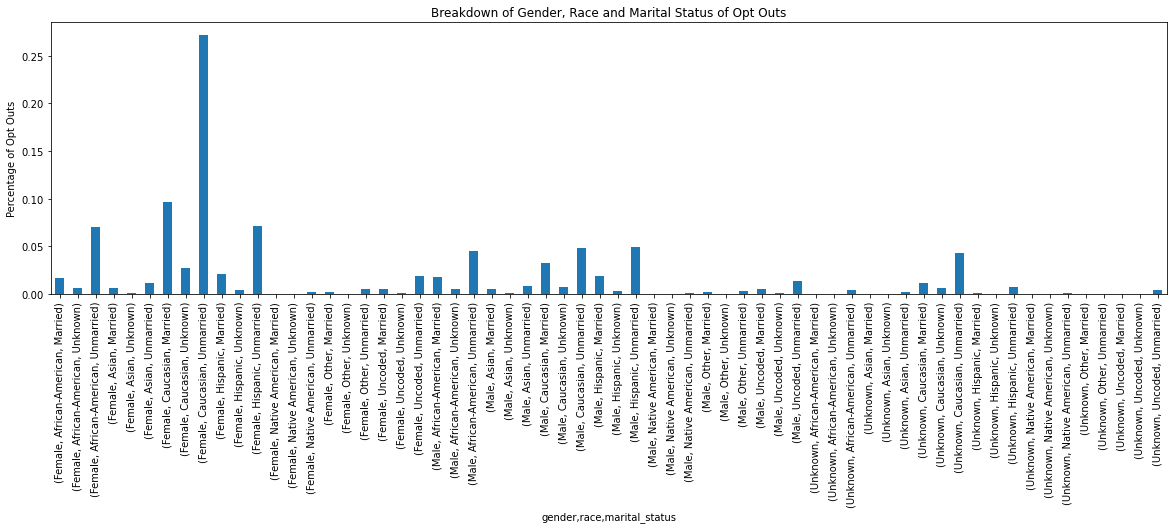

In [144]:
# plot of gender, age, and marital status for only opt outs
gender_race_marital_status = df.groupby(["gender", "race", "marital_status"]).size()
gender_race_marital_status = gender_race_marital_status / gender_race_marital_status.sum()
plt.figure(figsize=(20, 5))
gender_race_marital_status.plot(kind='bar')
plt.ylabel("Percentage of Opt Outs")
plt.title("Breakdown of Gender, Race and Marital Status of Opt Outs")
plt.show()

In [145]:
#unfinished
state_values = ['FL', 'CO','AZ', 'NV', 'PA','MI', 'UT', 'GA', 'OH', 'NC','MT','KS','IA','MN','TX','NE','WI','ME','CA','NY']

for state_x in state_values:
    state_df = df[df['state_x'] == state]
    state_race = state_df["race"].value_counts()
    state_race_vals = state_race / state_race.sum()
    print(state_race_vals)
    state_race_vals.plot(kind='bar', legend=True, alpha=.5)
    plt.xlabel("Race")
    plt.ylabel("Percentage of Opt Outs")
    plt.title("Race of Opt Outs in " + state)
    plt.show()

ValueError: Can only compare identically-labeled Series objects

In [146]:
#unfinished
for state_x in state_values:
    state_df = df[df['state_x'] == state]
    state_gender = state_df["gender"].value_counts()
    state_gender_vals = state_gender / state_gender.sum()
    print(state_gender_vals)
    state_gender_vals.plot(kind='bar', legend=True, alpha=.5)
    plt.xlabel("Gender")
    plt.ylabel("Percentage of Opt Outs")
    plt.title("Gender of Opt Outs in " + state)
    plt.show()

ValueError: Can only compare identically-labeled Series objects